# 1. Introduction
* Reference: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='darkgrid', context='notebook', palette='deep')

# 2. Data process

## 2.1 Load data

In [245]:
# Load the data
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

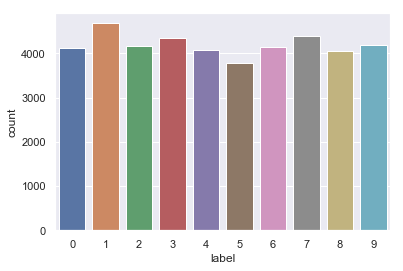

In [246]:
Y_train = train["label"]

# Drop "label" column
X_train = train.drop(labels="label", axis=1)

# free some space
del train

# y data visualization
g = sns.countplot(Y_train)
Y_train.value_counts()

## 2.2 Check for null and missing values

In [98]:
# Check the data
X_train.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [100]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## 2.3 Normalization

In [247]:
# Normalize the data
X_train /= 255.
test /= 255.

## 2.4 Reshape

In [248]:
# Reshape image in 3 dimensions (height = 28px, weight = 28px, channel = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## 2.5 Label encoding

In [249]:
# Encode label to one hot vectors
Y_train = to_categorical(Y_train, num_classes=10)

## 2.6 Split training and validation set

In [222]:
# Set the random seed
random_seed = 2

In [250]:
# Split the training set and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed, stratify=Y_train)

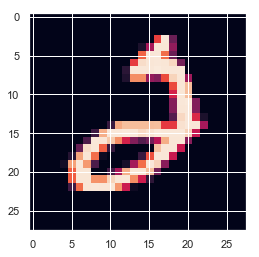

In [251]:
# example
g = plt.imshow(X_train[0][:,:,0])

# 3. Model - CNN

# 4. Evaluate the model

# 5. Prediction and submission